In [109]:
include(joinpath(@__DIR__, "../src/main.jl")) 
include("EAX.jl")
include("mEAX.jl")
include("Draw.jl")
using XLSX
using OffsetArrays

function Write_to_excel(row::Int, col::Int, obj::Float64)
    sheetnumber = 2
    cols = ["B", "C", "D", "E", "F", "G", "H", "I", "J", "K"]
    XLSX.openxlsx("He_Results.xlsx", mode="rw") do xf
        sheet = xf[sheetnumber]
        sheet[cols[col]*string(row)] = obj
    end
end

Write_to_excel (generic function with 1 method)

In [92]:
# instances = [:eil51]
# Ms = [2]
# test(instances, Ms)

In [ ]:
# dir_name = "set1"
# sample_names = ["mtsp150_3", "mtsp150_5", "mtsp150_10", "kroa200_3", "kroa200_5","kroa200_10", "lin318_3", "lin318_5", "lin318_10"]

# Solve_instances(dir_name, sample_names)

In [ ]:

dir_name = "set1"
sample_names = ["mtsp150_5"] #["mtsp150_3", "mtsp150_5", "mtsp150_10", "kroa200_3", "kroa200_5","kroa200_10", "lin318_3", "lin318_5", "lin318_10"] #["mtsp51_3", "mtsp51_5", "mtsp51_10", "mtsp100_3", "mtsp100_5", "mtsp100_10", "mtsp100_20", "mtsp150_3", 
#      "mtsp150_5", "mtsp150_10", "mtsp150_20", "mtsp150_30", "gtsp150_3", "gtsp150_5", "gtsp150_10", "gtsp150_20", 
#     "gtsp150_30", "kroa200_3", "kroa200_5","kroa200_10","kroa200_20", "lin318_3", "lin318_5", "lin318_10", "lin318_20"]
# sample_names = ["att532_3", "att532_5", "att532_10", "att532_20"]
# T, depot, Customers = Calculate_TSPLIB(sample_name)
best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
all_chrms = Chromosome[]

row = 0
for sample_name in sample_names
    row += 1
    println(sample_name)
    m, T, depot_, customers = read_data(dir_name, sample_name)
    Customers = copy(transpose(customers))
    depot = Float64.(depot_)
    n = size(T)[1]-2
    demands = ones(Int, n)
    W = 1000
    h = 0.3
    popsize = (10,20)
    k_tournament = 2
    num_iter = 1000000
    time_limit = (n+1)/5 #*240/100
    Mutation_Chance = 0.0
    num_runs = 10
    num_nei = 2
    avg = 0.0
    best = Inf
    worst = 0.0
    crossover_functions = [2]

    t1 = time()
    for i=1:num_runs
        P, roullet = Perform_Genetic_Algorithm(T, m, h, popsize, 
                    k_tournament, num_iter, time_limit, Mutation_Chance, num_nei, crossover_functions, Customers, depot);
    #             roullet_ = roullet_ + roullet
#         Write_to_excel(row, i, P[1].fitness)
        avg += P[1].fitness
        push!(all_chrms, P[1])
        if P[1].fitness < best
            best = P[1].fitness
            best_chrm = P[1]
        end
        if P[1].fitness > worst
            worst = P[1].fitness
            worst_chrm = P[1]
        end
    end
    t2 = time()
    println("Results for ", sample_name, " ,m=", m)
    println("Best: ", round(best, digits = 2), "  Average: ", round(avg/num_runs, digits = 2), 
        "  Worst: ", round(worst, digits = 2), " , run time= ", round((t2-t1)/num_runs, digits=0))
end

mtsp150_5
Generation 0 the best objective is: 9811.558992884802
Generation 1000 the best objective is: 8791.045543782984
Generation 2000 the best objective is: 8715.20537664644
Generation 3000 the best objective is: 8698.125211196519
Generation 4000 the best objective is: 8643.314142362267
Generation 5000 the best objective is: 8643.314142362267
Generation 6000 the best objective is: 8643.314142362267


Tour 1:8401.236992512633
Tour 2:8498.94097458867
Tour 3:8347.44781408735
Tour 4:8413.737771624088
Tour 5:8494.031660533969


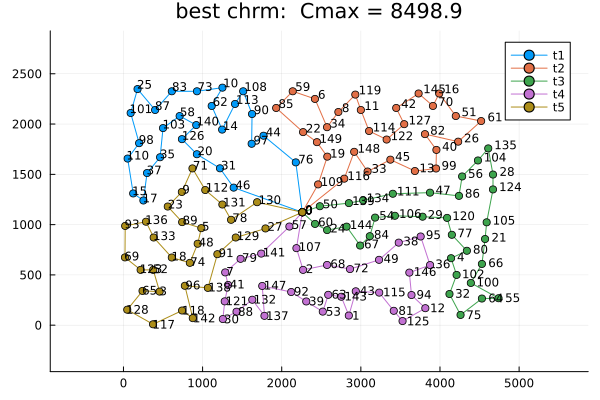

In [78]:
dir_name = "set1"
sample_name = "mtsp150_5" 
m, T, depot_, customers = read_data(dir_name, sample_name)
Customers = copy(transpose(customers))
depot = Float64.(depot_)
Draw_Solution(best_chrm, depot, Customers, "best chrm: ", best_chrm.fitness)

Tour 1:8743.653432937763
Tour 2:8714.311173407985
Tour 3:8706.109860227454
Tour 4:8723.909470914481
Tour 5:8720.865964081373


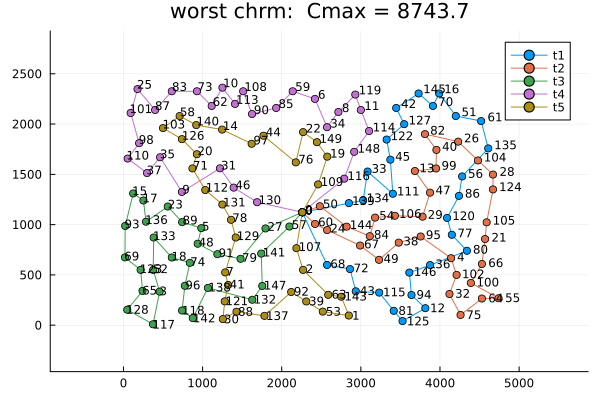

In [79]:
Draw_Solution(worst_chrm, depot, Customers, "worst chrm: ", worst_chrm.fitness)

Tour 1:9103.856434154228
Tour 2:9177.019082728833
Tour 3:9133.930476358022
Tour 4:9200.747013648577
Tour 5:9223.046365399823


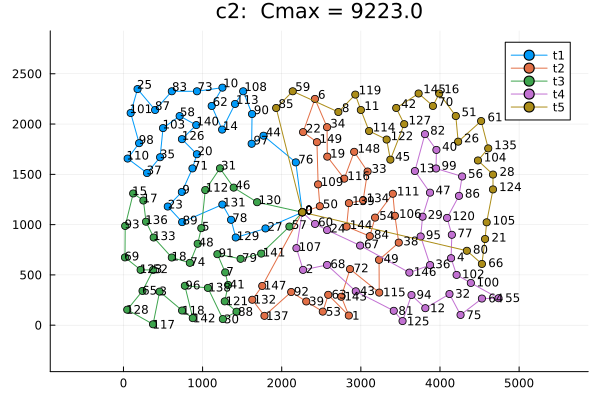

In [41]:
Draw_Solution(c2, depot, Customers, "c2: ", c2.fitness)

In [17]:
n = size(T)[1]-2
m_eax_crossover(c1.tours, c2.tours, T, n)

LoadError: BoundsError: attempt to access 0-element Vector{ABcycle} at index [1]

In [32]:
p1 = deepcopy(c1.tours)
p2 = deepcopy(c2.tours)
EA = Vector{Tuple{Int, Int}}()
EAp = Vector{Tuple{Int, Int}}()
EB = Vector{Tuple{Int, Int}}()

for tour in p1
    temp1 = copy(tour.Sequence)

    push!(temp1, 0)
    pushfirst!(temp1, 0)
    EA = vcat(EA, [(temp1[i], temp1[i+1]) for i in 1:length(temp1)-1])
    EAp = vcat(EAp, [(temp1[i+1], temp1[i]) for i in 1:length(temp1)-1])
end
for tour in p2
    temp2 = copy(tour.Sequence)
    push!(temp2, 0)
    pushfirst!(temp2, 0)
    EB = vcat(EB, [(temp2[i], temp2[i+1]) for i in 1:length(temp2)-1])

end
ab = intersect(EA, EB)
apb = intersect(EAp, EB)
abp = Vector{Tuple{Int, Int}}()
for pair in apb
    push!(abp, (pair[2], pair[1]))
end
EA_ = copy(EA)
EA = setdiff(EA, ab, abp)
EB = setdiff(EB, ab, apb)

3-element Vector{Tuple{Int64, Int64}}:
 (124, 102)
 (77, 4)
 (4, 80)

In [34]:
paths = Vector{Vector{Int}}()
AB_Cycles = ABcycle[]
vertex = rand(collect(Iterators.flatten(EA)))
first_parent = true
path = [vertex]
cycle = abEdge[]
masks = zeros(Int, n+1)
masks[vertex+1] = 1
count = 1

while !isempty(EA) || !isempty(EB)
    count += 1
    next_edge = (0,0)

    if first_parent
        if 1==2 #count%2 == 0
            linked_edges = filter(e -> (e[1] == vertex && e[2] != path[1]) || (e[2] == vertex && e[1] != path[1]), EA)
        else
            linked_edges = filter(e -> e[1] == vertex || e[2] == vertex, EA)
        end
        next_edge = rand(linked_edges)
        deleteat!(EA, findfirst(x->x==next_edge, EA))
    else
        if 1==2 #count%2 == 0
            linked_edges = filter(e -> (e[1] == vertex && e[2] != path[1]) || (e[2] == vertex && e[1] != path[1]), EB)
        else
            linked_edges = filter(e -> e[1] == vertex || e[2] == vertex, EB)
        end
        next_edge = rand(linked_edges)
        deleteat!(EB, findfirst(x->x==next_edge, EB))
    end

    if vertex == next_edge[2]
        vertex = next_edge[1]
    else
        vertex = next_edge[2]
    end
    push!(path, vertex)
    push!(cycle, abEdge(next_edge, first_parent))

#         println("edge: $next_edge from parent $(2-Int(first_parent)), vertex: $vertex, count: $count, masks[$(vertex)]=$(masks[vertex+1])")
    if masks[vertex+1] > 0 
        if (count - masks[vertex+1]) % 2 == 0
            temp = copy(cycle[masks[vertex+1]:count-1])
            temp2 = copy(path[masks[vertex+1]:count])
#                 for i in temp2
#                     print(i, " ")
#                 end
#                 println()
            push!(AB_Cycles, ABcycle(temp, count-masks[vertex+1], temp2[1:end-1]))
            push!(paths, temp2)

            if vertex == path[1] 
                path = Int[]
                cycle = abEdge[]
                masks = zeros(Int, n+1)
#                     println("One complete tour, started and ended at $vertex")
            else
                deleteat!(cycle, [i for i=masks[vertex+1]:count-1])
                deleteat!(path, [i for i=masks[vertex+1]+1:count])
                count = masks[vertex+1]
                masks = zeros(Int, n+1)
                for (i, node) in enumerate(path)
                    if masks[node+1] == 0 
                        masks[node+1] = i
                    end
                end
            end

            if length(path) == 0
                if first_parent
                    remaining_nodes = collect(Iterators.flatten(EB))
                else
                    remaining_nodes = collect(Iterators.flatten(EA))
                end
                if isempty(remaining_nodes)
                    break
                end
                vertex = rand(remaining_nodes)
                path = [vertex]
#                     println("Started over from node $vertex")
                count = 1
                masks[vertex+1] = count
            end
        end
    else
        masks[vertex+1] = count
    end
#     if cycle[1] == vertex
#         push!(cycles, cycle)
#     end
    first_parent = !first_parent
end

In [35]:
AB_Cycles

1-element Vector{ABcycle}:
 ABcycle(abEdge[abEdge((102, 4), true), abEdge((4, 80), false), abEdge((77, 80), true), abEdge((77, 4), false), abEdge((4, 124), true), abEdge((124, 102), false)], 6, [102, 4, 80, 77, 4, 124])

In [25]:
AB

27

In [26]:
length(b)

26

In [ ]:
include("GA.jl")
include("Neighborhood.jl")
include("Initial.jl")
include("Mutation.jl")
include("Crossover.jl")
include("Split.jl")

row = 25
for sample_name in [:fnl4461, :rl5915]
# sample_name = :pcb1173
    T, depot, Customers = Calculate_TSPLIB(sample_name)
    for m in [3, 5, 10, 20]
        row += 1
        println(sample_name,"_", m)
        best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
        worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
        all_chrms = Chromosome[]    
        n = size(T)[1]-2
        demands = ones(Int, n)
        W = 10000
        h = 0.3
        popsize = (10,20)
        k_tournament = 2
        num_iter = 10000
        time_limit = (n+1)*240/100
        Mutation_Chance = 1.0
        num_runs = 1
        num_nei = 2
        avg = 0.0
        best = Inf
        worst = 0.0
        crossover_functions = [9]

        t1 = time()
        for i=1:num_runs
            P, roullet = Perform_Genetic_Algorithm(T, demands,m, W, h, popsize, 
                k_tournament, num_iter, time_limit, Mutation_Chance, num_nei, crossover_functions, Customers, depot);
#                     roullet_ = roullet_ + roullet
#             Write_to_excel(row, i, P[1].fitness)
            avg += P[1].fitness
            push!(all_chrms, P[1])
            if P[1].fitness < best
                best = P[1].fitness
                best_chrm = P[1]
            end
            if P[1].fitness > worst
                worst = P[1].fitness
                worst_chrm = P[1]
            end
        end
        t2 = time()
        println("Results for ", sample_name, " ,m=", m)
        println("Best: ", round(best, digits = 2), "  Average: ", round(avg/num_runs, digits = 2), 
            "  Worst: ", round(worst, digits = 2), " , run time= ", round((t2-t1)/num_runs, digits=0))
    end
end